In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Import all required and helper libraries here
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

%matplotlib inline

print ("Numpy Version - ", np.__version__)
print ("Pandas Version - ", pd.__version__)

Numpy Version -  1.18.5
Pandas Version -  1.0.5


In [2]:
# Define all required functions here
def rescale (x):
    return (x/1000000)

def string_reformat (x):
    string_arr = x.split('-')
    string_join = string_arr[1] + " - " + string_arr[0]
    return string_join

In [3]:
data_path = r"dataset/"

In [4]:
netflix_df = pd.read_csv(data_path + "DataNetflixRevenue2020_V2.csv") 

netflix_df

,Area,Years,Revenue
0,United States and Canada,Q1 - 2018,1976157000
1,"Europe, Middle East and Africa",Q1 - 2018,886649000
2,Latin America,Q1 - 2018,540182000
3,Asia-Pacific,Q1 - 2018,199117000
4,United States and Canada,Q2 - 2018,2049546000
5,"Europe, Middle East and Africa",Q2 - 2018,975497000
6,Latin America,Q2 - 2018,568071000
7,Asia-Pacific,Q2 - 2018,221252000
8,United States and Canada,Q3 - 2018,2094850000
9,"Europe, Middle East and Africa",Q3 - 2018,1004749000


In [5]:
netflix_df['Years_Reformat'] = netflix_df['Years'].apply(string_reformat)
netflix_df['Revenue_Rescale'] = netflix_df['Revenue'].apply(rescale)

print (netflix_df['Area'].unique())
netflix_df.head()

['United States and Canada' 'Europe,  Middle East and Africa'
 'Latin America' 'Asia-Pacific']


,Area,Years,Revenue,Years_Reformat,Revenue_Rescale
0,United States and Canada,Q1 - 2018,1976157000,2018 - Q1,1976.157
1,"Europe, Middle East and Africa",Q1 - 2018,886649000,2018 - Q1,886.649
2,Latin America,Q1 - 2018,540182000,2018 - Q1,540.182
3,Asia-Pacific,Q1 - 2018,199117000,2018 - Q1,199.117
4,United States and Canada,Q2 - 2018,2049546000,2018 - Q2,2049.546


In [6]:
netflix_pivot = pd.pivot_table(netflix_df, index=['Years_Reformat'], columns=['Area'], 
                               values=['Revenue_Rescale'], aggfunc=np.sum)
netflix_pivot.reset_index(inplace=True)
netflix_pivot.columns = ['Years', 'United States and Canada', 'Europe,  Middle East and Africa', 
                         'Latin America', 'Asia-Pacific']

netflix_pivot

,Years,United States and Canada,"Europe, Middle East and Africa",Latin America,Asia-Pacific
0,2018 - Q1,199.117,886.649,540.182,1976.157
1,2018 - Q2,221.252,975.497,568.071,2049.546
2,2018 - Q3,248.691,1004.749,562.307,2094.850
3,2018 - Q4,276.756,1096.812,567.137,2160.979
4,2019 - Q1,319.602,1233.379,630.472,2256.851
5,2019 - Q2,349.494,1319.087,677.136,2501.199
6,2019 - Q3,382.304,1428.040,741.434,2621.250
7,2019 - Q4,418.121,1562.561,746.392,2671.908
8,2020 - Q1,483.660,1723.474,793.453,2702.776
9,2020 - Q2,569.140,1892.537,785.368,2839.670


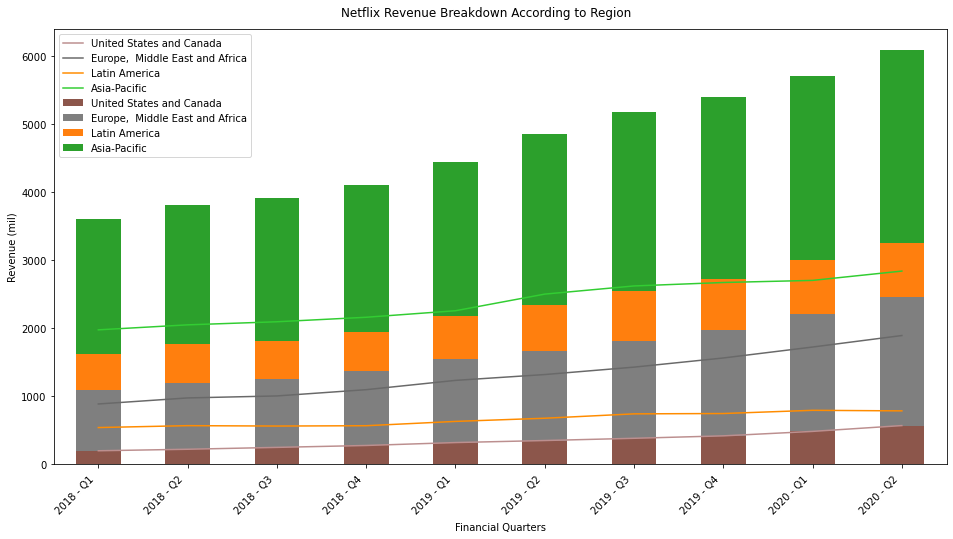

In [7]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 1, 1)

x_labels = netflix_pivot['Years'] 
y1_labels = np.arange(0, 7000, 1000)

my_colormap1 = ['tab:brown', 'tab:gray', 'tab:orange', 'tab:green']
my_colormap2 = ['rosybrown', 'dimgray', 'darkorange', 'limegreen']

ax1 = netflix_pivot.plot(kind='bar', stacked=True, x='Years', y=['United States and Canada', 
                         'Europe,  Middle East and Africa', 'Latin America', 'Asia-Pacific'], color=my_colormap1, ax=ax1)

ax2 = netflix_pivot.plot(kind='line', color=my_colormap2 , ax=ax1)

fig.suptitle('Netflix Revenue Breakdown According to Region', y=0.92)
ax1.set_xlabel('Financial Quarters')
ax1.set_xticklabels(x_labels, rotation=45, ha='right')
ax1.set_ylabel('Revenue (mil)')
ax1.set_yticklabels(y1_labels)
#ax2.set_yticklabels(y2_labels)

plt.show()

In [8]:
netflix_revenue = netflix_pivot.sum().iloc[1:]
netflix_revenue.columns=['Region', 'Total Revenue (mil)']

print(type(netflix_revenue))
print(netflix_revenue.shape)

netflix_revenue

<class 'pandas.core.series.Series'>
(4,)


United States and Canada           3468.14
Europe,  Middle East and Africa    13122.8
Latin America                      6611.95
Asia-Pacific                       23875.2
dtype: object

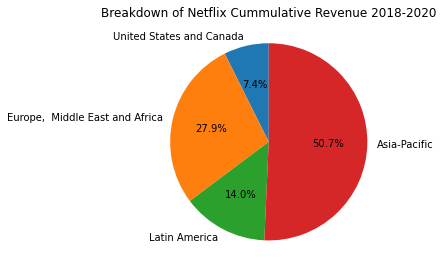

In [9]:
#fig = plt.figure(figsize=(16,8))
fig, ax1 = plt.subplots()
labels = netflix_df['Area'].unique()

ax1.pie(netflix_revenue, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90)
ax1.axis('equal')
ax1.set_title("Breakdown of Netflix Cummulative Revenue 2018-2020", y=1.05)

plt.show()

In [10]:
netflix_pivot_df = netflix_pivot
netflix_pivot_df['United States and Canada Growth'] = netflix_pivot['United States and Canada'].div(
                                                      netflix_pivot['United States and Canada'].shift(1)) - 1
netflix_pivot_df['Europe, Middle East and Africa Growth'] = netflix_pivot['Europe,  Middle East and Africa'].div(
                                                            netflix_pivot['Europe,  Middle East and Africa'].shift(1)) - 1
netflix_pivot_df['Latin America Growth'] = netflix_pivot['Latin America'].div(
                                           netflix_pivot['Latin America'].shift(1)) - 1
netflix_pivot_df['Asia-Pacific Growth'] = netflix_pivot['Asia-Pacific'].div(
                                          netflix_pivot['Asia-Pacific'].shift(1)) - 1
netflix_pivot_df = netflix_pivot_df.fillna(0)
netflix_pivot_df

,Years,United States and Canada,"Europe, Middle East and Africa",Latin America,Asia-Pacific,United States and Canada Growth,"Europe, Middle East and Africa Growth",Latin America Growth,Asia-Pacific Growth
0,2018 - Q1,199.117,886.649,540.182,1976.157,0.000000,0.000000,0.000000,0.000000
1,2018 - Q2,221.252,975.497,568.071,2049.546,0.111166,0.100207,0.051629,0.037137
2,2018 - Q3,248.691,1004.749,562.307,2094.850,0.124017,0.029987,-0.010147,0.022104
3,2018 - Q4,276.756,1096.812,567.137,2160.979,0.112851,0.091628,0.008590,0.031567
4,2019 - Q1,319.602,1233.379,630.472,2256.851,0.154815,0.124513,0.111675,0.044365
5,2019 - Q2,349.494,1319.087,677.136,2501.199,0.093529,0.069490,0.074014,0.108269
6,2019 - Q3,382.304,1428.040,741.434,2621.250,0.093879,0.082597,0.094956,0.047997
7,2019 - Q4,418.121,1562.561,746.392,2671.908,0.093687,0.094200,0.006687,0.019326
8,2020 - Q1,483.660,1723.474,793.453,2702.776,0.156746,0.102980,0.063051,0.011553
9,2020 - Q2,569.140,1892.537,785.368,2839.670,0.176736,0.098094,-0.010190,0.050649


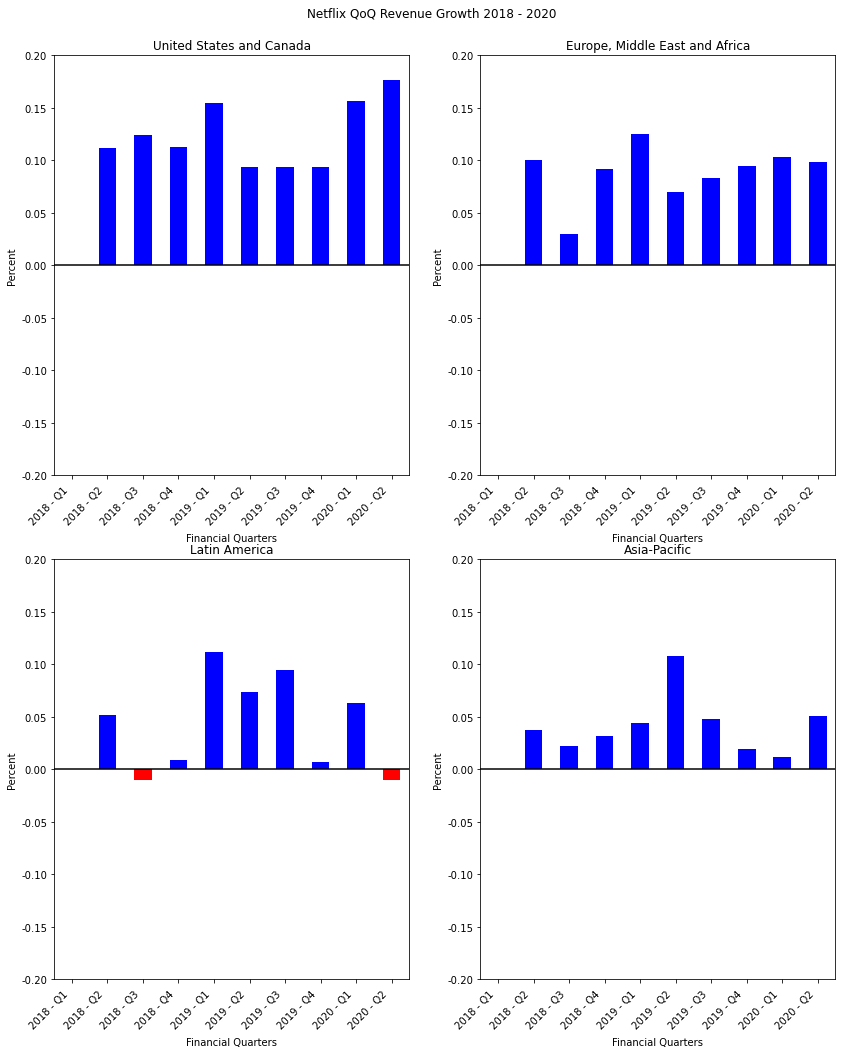

In [11]:
region_growth = ['United States and Canada', 
                 'Europe, Middle East and Africa', 
                 'Latin America', 
                 'Asia-Pacific']
yticks = []
ystart = -0.20
ystep = 0.05

for count in range(9):
    yticks.append((count*ystep) + ystart)

fig = plt.figure(figsize=(14,17))
plt.suptitle("Netflix QoQ Revenue Growth 2018 - 2020", y=0.92)


for i in range(4):
    ax1 = fig.add_subplot(2, 2, i+1)
    ax1 = netflix_pivot_df.plot(kind='bar', x='Years', y=[region_growth[i] + ' Growth'], ax=ax1, legend=None, color=[np.where(netflix_pivot_df[region_growth[i] + ' Growth']>0, 'b', 'r')])
    ax1.set_title(region_growth[i], y=1.0)
    ax1.set_xlabel('Financial Quarters')
    ax1.set_xticklabels(x_labels, rotation=45, ha='right')
    ax1.set_ylabel('Percent')
    ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    ax1.set_yticks(yticks)
    ax1.axhline(y=0, color='black')

plt.savefig("netflix_revenue_growth.jpg")
plt.show()